<a href="https://colab.research.google.com/github/AbhishekGupta-193/Brain_Cancer_Detection/blob/main/Brain_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/BrainTumorData.zip"


Archive:  /content/gdrive/MyDrive/BrainTumorData.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  in

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np #simple array to numpy array conversion with multiple functionalities
import matplotlib.pyplot as plt #graph plotting
import os #gives info abt system
import math
import shutil 
import glob 

In [ ]:
from IPython.core import display_trap
ROOT_DIR="/content/Brain Tumor Data/Brain Tumor Data Set"
number_of_images = {} # {}-dictionary,()-tuple,[]-list

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir))) 

In [ ]:
number_of_images.items()

dict_items([('Brain Tumor', 2513), ('Healthy', 2087)])

In [ ]:
#CREATING A TRAINING FOLDER
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                               size=(math.floor(70/100*number_of_images[dir])-5),#5 ????
                               replace=False):

      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join("./train",dir)
      shutil.copy(O,D)
      os.remove(O)                                                             
else :
  print("TRAIN FOLDER EXISTS")


TRAIN FOLDER EXISTS


In [ ]:
def dataFolder(p,split):
  #WE CREATE A TRAINING FOLDER
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                               size=(math.floor(split*number_of_images[dir])-5),
                               replace=False):

       O = os.path.join(ROOT_DIR,dir,img)
       D = os.path.join("./"+p,dir)
       shutil.copy(O,D)
       os.remove(O)                                                             
  else :
   print(f"{p}FOLDER EXISTS")



In [ ]:
dataFolder("train",0.7)

trainFOLDER EXISTS


In [ ]:
dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.15)

In [ ]:
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir))) 
number_of_images.items()

dict_items([('Brain Tumor', 17), ('Healthy', 16)])

#MODEL BUILD


In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

#tensorflow- package
#keras-API

In [ ]:
from tensorflow.keras.utils import load_img,img_to_array #load_img is a function that converts img into matrix
import tensorflow.keras.utils

In [ ]:
#CNN MODEL

model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3))) #3 denotes 3D matrix with rgb layes 

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

Preparing our Data using DataGenerator


In [ ]:
def preprocessingImages1(path):
# """
# input :path
# output :Pre processed images
# """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

  #to give proper dimnesion to image before further processing

In [ ]:
path="/content/train"
train_data = preprocessingImages1(path) 

Found 3209 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [ ]:
def preprocessingImages2(path):
# """
# input :path
# output :Pre processed images
# """
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [ ]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
#EARLY STOPPING AND MODELCHECKPOINTS

from keras.callbacks import ModelCheckpoint,EarlyStopping

#EARLY STOPPING 

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode='auto')

#MODELCHECK POINT

mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,mode='auto')

cd=[es,mc]


**Model** **Training**

In [ ]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,#ivides a particular data into 8 parts and then analyses it individually
                       epochs=30, #iterations of dataset
                       verbose=1,#shows status
                       validation_data=val_data,validation_steps=16,callbacks=cd)

<ipython-input-34-7d076bd700fc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs=model.fit_generator(generator=train_data,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.6781
Epoch 1: saving model to ./bestmodel.h5
8/8 [==============================] - 5s 709ms/step - loss: 0.6406 - accuracy: 0.6781 - val_loss: 0.6256 - val_accuracy: 0.6719
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.6658 - accuracy: 0.6133
Epoch 2: saving model to ./bestmodel.h5
8/8 [==============================] - 5s 677ms/step - loss: 0.6658 - accuracy: 0.6133 - val_loss: 0.5894 - val_accuracy: 0.6973
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.6166 - accuracy: 0.6680
Epoch 3: saving model to ./bestmodel.h5
8/8 [==============================] - 5s 673ms/step - loss: 0.6166 - accuracy: 0.6680 - val_loss: 0.6741 - val_accuracy: 0.6094
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.6680
Epoch 4: saving model to ./bestmodel.h5
8/8 [==============================] - 5s 699ms/step - loss: 0.6208 - accuracy: 0.668

In [ ]:
#MODEL GRAPHICAL INTERPRETATION

h=hs.history
h.keys()

dict_keys(['loss','accuracy','val_loss','val_accuracy'])

NameError: ignored

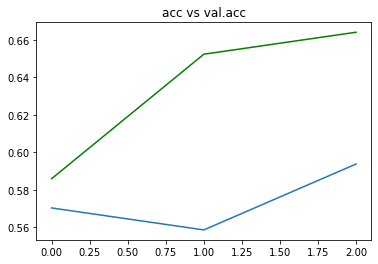

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="green")

plt.title("acc vs val.acc")
plt.show()

In [ ]:
#MODEL ACCURACY
from keras.models import load_model
model = load_model("/content/bestmodel.h5")


Model Accuracy

In [ ]:
acc=model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")


<ipython-input-37-2ef1360e9ba2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(test_data)[1]


the accuracy of our model is 78.20324301719666%


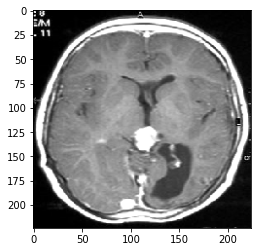

1/1 [==============================] - 0s 256ms/step
the MRI is not having a Tumor


In [ ]:
path="/content/train/Brain Tumor/Cancer (1002).JPG"

img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/225

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr=np.expand_dims(input_arr,axis=0)

pred=model.predict(input_arr)[0][0]
pred

if pred==0:
  print("the MRI is having a Tummor")
else:
  print("the MRI is not having a Tumor")